In [1]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.0 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import control as ctl
from control import (TransferFunction)

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 14 # tamanho da letraimport matplotlib.pyplot as plt

<TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  1
-----
s + 5

<TransferFunction>: sys[1]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


17.36
-----
  s

<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


      17.36
-----------------
s^2 + 5 s + 17.36

    Eigenvalue (pole)       Damping     Frequency
      -2.5    +3.333j           0.6         4.167
      -2.5    -3.333j           0.6         4.167


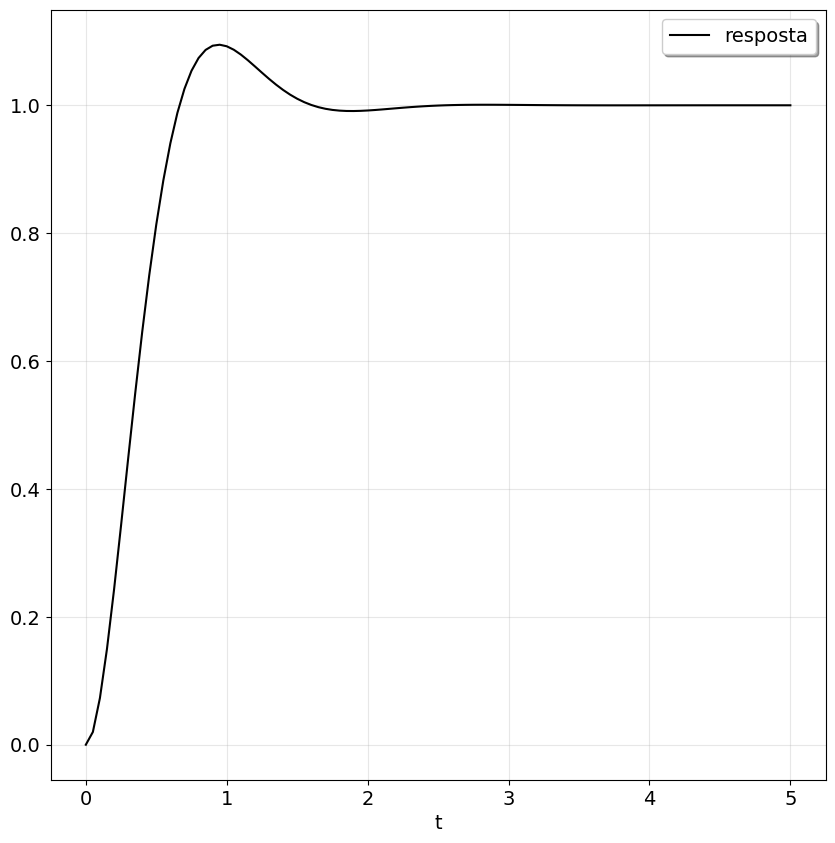

In [3]:
t = np.linspace(0, 5, 101)

# FT da planta 1/(s+5)
planta = TransferFunction(1, [1,5])
print(planta)

# FT do controle 17.36/s
controle = TransferFunction(17.36, [1,0]) # 17.36
print(controle)

# Malha aberta L = planta*controle (ordem não atrapalha)
malha_aberta = ctl.series(planta, controle)
# Malha fechada sys1 = linha de cima e sys2 a linha de baixo da realimentação
# ver mais sobre o comando feedback em
#https://python-control.readthedocs.io/en/latest/generated/control.feedback.html
malha_fechada = ctl.feedback(sys1 = malha_aberta, sys2=1, sign=-1)
print(malha_fechada)

# dados do polos
wn, damping, pole = ctl.damp(malha_fechada)

# Resposta ao degrau
tout, yout = ctl.step_response(malha_fechada, t, X0=0)
#T, yout = step_response(sys, T, X0)
plt.plot(tout, yout, 'k', linewidth=1.5, label='resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()



In [ ]:
# ver mais sobre o comando feedback em
#https://python-control.readthedocs.io/en/latest/generated/control.feedback.html

sys1 = TransferFunction(1, [1,1])
sys2 = TransferFunction(1, [1,0])
malha_fechada = ctl.feedback(10*sys1, sys2, sign=-1)

print(malha_fechada)


    10 s
------------
s^2 + s + 10

